# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "\02-Homework\11-Web\Instructions\Resources"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
city_response = []
units = "imperial"
for api_city_call in cities:
        print("City Name: " + response['name'] + " \t" + "City ID: " + str(response['id']))
        city_response.append(response)

NameError: name 'response' is not defined

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
print(len(city_response))
for humid_city_index in range(len(city_response)):
    if city_response[humid_city_index]['main']["humidity"] > 100:
        city_response.pop(humid_city_index)
        humid_city_index -=1
print(len(city_response))

0
0


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = pd.DataFrame(columns=['City',
                                      'Lat',
                                      'Longitude',
                                      'Max Temp',
                                      'Humidity',
                                      'Cloudiness',
                                      'Wind Speed',
                                      'Country'])
clean_city_df
# temp_response = city_response[0]
# clean_city_df = clean_city_df.append({
#                                       'City':temp_response['name'],
#                                       'Lat':temp_response['coord']['lat'],
#                                       'Longitude':temp_response['coord']['lon'],
#                                       'Max Temp':temp_response['main']['temp_max'],
#                                       'Humidity':temp_response['main']['humidity'],
#                                       'Cloudiness':temp_response['clouds']['all'],
#                                       'Wind Speed':temp_response['wind']['speed'],
#                                       'Country':temp_response['sys']['country']
#                                         },ignore_index = True)

for rep in city_response:
    clean_city_df = clean_city_df.append({
                                      'City':rep['name'],
                                      'Lat':rep['coord']['lat'],
                                      'Longitude':rep['coord']['lon'],
                                      'Max Temp':rep['main']['temp_max'],
                                      'Humidity':rep['main']['humidity'],
                                      'Cloudiness':rep['clouds']['all'],
                                      'Wind Speed':rep['wind']['speed'],
                                      'Country':rep['sys']['country']
                                        },ignore_index = True)
                                    

In [ ]:
clean_city_df.to_csv(path_or_buf="clean_city_df.csv",index=False)
clean_city_df


,City,Lat,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

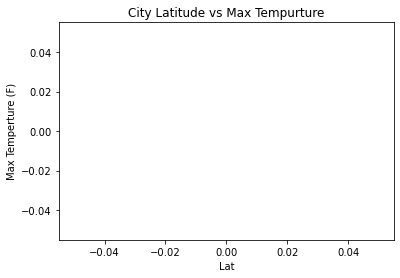

In [ ]:
lat_temp_plot = clean_city_df.plot(kind="scatter", x='Lat',y='Max Temp', title="City Latitude vs Max Tempurture")
lat_temp_plot.set_ylabel("Max Temperture (F)")
plt.show()

## Latitude vs. Humidity Plot

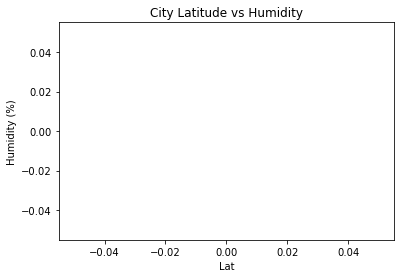

In [ ]:
lat_temp_plot = clean_city_df.plot(kind="scatter", x='Lat',y='Humidity', title="City Latitude vs Humidity")
lat_temp_plot.set_ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

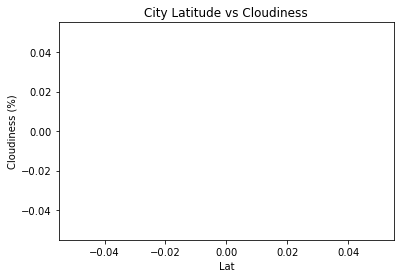

In [ ]:
lat_temp_plot = clean_city_df.plot(kind="scatter", x='Lat',y='Cloudiness', title="City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

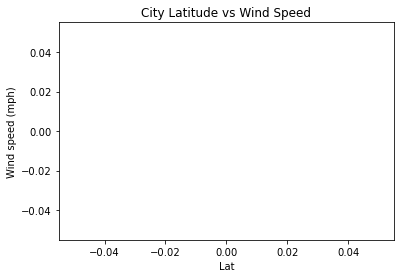

In [ ]:
lat_temp_plot = clean_city_df.plot(kind="scatter", x='Lat',y='Wind Speed', title="City Latitude vs Wind Speed")
lat_temp_plot.set_ylabel("Wind speed (mph)")
plt.show()

## Linear Regression

In [ ]:
north_df = clean_city_df[clean_city_df['Lat'] >= 0]
north_df

,City,Lat,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = north_df.plot(kind="scatter", x='Lat',y='Max Temp', title="City Latitude vs Max Tempurture")
lat_temp_plot.set_ylabel("Max Temperture (F)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

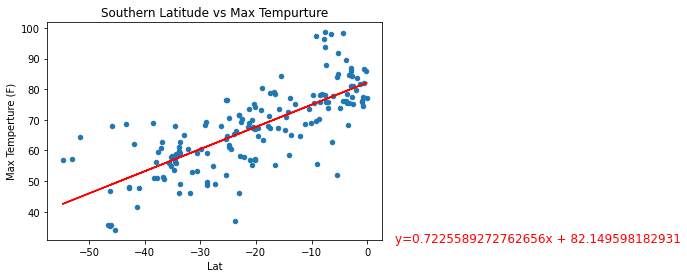

In [ ]:
south_df = clean_city_df[clean_city_df['Lat'] < 0]
south_df

x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = south_df.plot(kind="scatter", x='Lat',y='Max Temp', title="Southern Latitude vs Max Tempurture")
lat_temp_plot.set_ylabel("Max Temperture (F)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

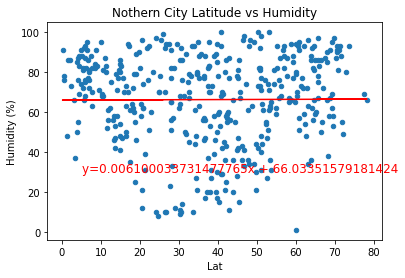

In [ ]:
x_values = north_df['Lat']
y_values = np.array(north_df['Humidity'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = north_df.plot(kind="scatter", x='Lat',y='Humidity', title="Nothern City Latitude vs Humidity")
lat_temp_plot.set_ylabel("Humidity (%)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

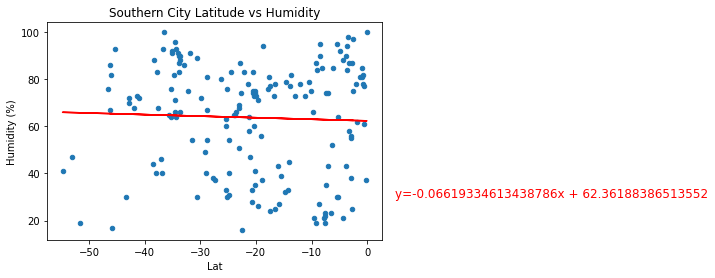

In [ ]:
x_values = south_df['Lat']
y_values = np.array(south_df['Humidity'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = south_df.plot(kind="scatter", x='Lat',y='Humidity', title="Southern City Latitude vs Humidity")
lat_temp_plot.set_ylabel("Humidity (%)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

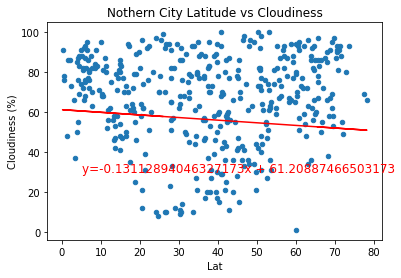

In [ ]:
x_values = north_df['Lat']
y_values = np.array(north_df['Cloudiness'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = north_df.plot(kind="scatter", x='Lat',y='Humidity', title="Nothern City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Cloudiness (%)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

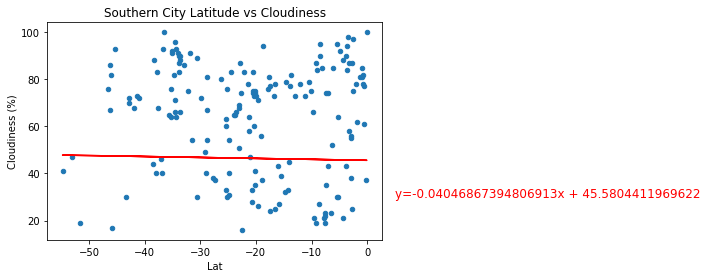

In [ ]:
x_values = south_df['Lat']
y_values = np.array(south_df['Cloudiness'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = south_df.plot(kind="scatter", x='Lat',y='Humidity', title="Southern City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Cloudiness (%)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

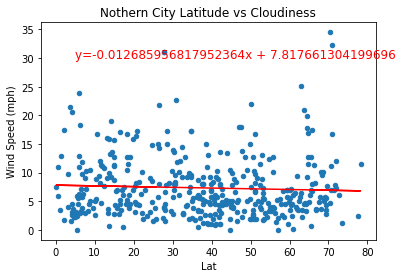

In [ ]:
x_values = north_df['Lat']
y_values = np.array(north_df['Wind Speed'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = north_df.plot(kind="scatter", x='Lat',y='Wind Speed', title="Nothern City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Wind Speed (mph)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

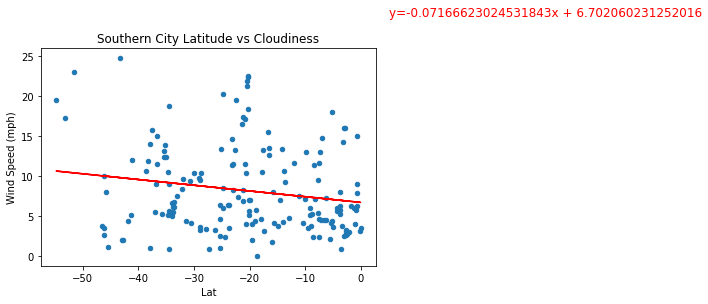

In [ ]:
x_values = south_df['Lat']
y_values = np.array(south_df['Wind Speed'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = south_df.plot(kind="scatter", x='Lat',y='Wind Speed', title="Southern City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Wind Speed (mph)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()